# softmax回归
softmax回归和线性回归一样都是将输入特征与权重做线性叠加，但是softmax回归的输出值个数等于标签中的类别数，对每个输入计算出输出。

softmax回归是单层神经网络，每个输出的计算依赖于所有的输入。

将输出值中最大的输出作为对应类的预测输出。

In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

D:\python\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### 数据获取与处理

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



可视化前几个数据

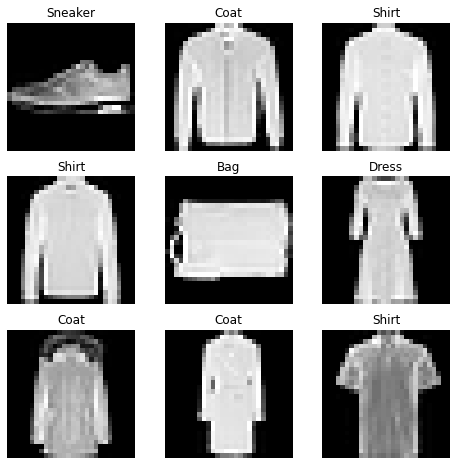

In [3]:
import matplotlib.pyplot as plt
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [4]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=256, shuffle=True)

### 网络设置

In [5]:
from torch import nn

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10)) # 网络

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights); # 初始化

### 训练

In [6]:
loss = nn.CrossEntropyLoss(reduce=None) # 交叉熵损失函数
trainer = torch.optim.SGD(net.parameters(), lr=0.2) # 优化器
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in train_dataloader:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.mean().backward()
        trainer.step()
    l = loss(net(training_data.data.float()), training_data.targets).sum()
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 68.026367
epoch 2, loss 93.370003
epoch 3, loss 123.592888
epoch 4, loss 71.340103
epoch 5, loss 84.425278
epoch 6, loss 102.434952
epoch 7, loss 94.953651
epoch 8, loss 75.840286
epoch 9, loss 76.399208
epoch 10, loss 92.836731


### 结果查看

0.7728


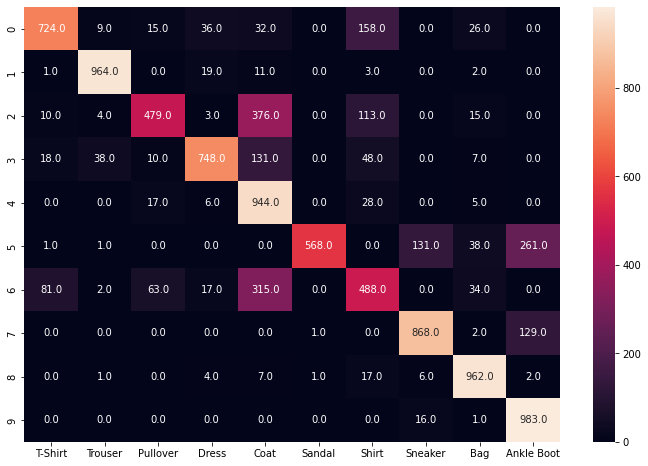

In [7]:
# 测试集结果
y_pred = net(torch.unsqueeze(test_data.data.float(), 1)).argmax(axis=1)
y_pred = [i.item() for i in y_pred] # 将tensor转为数字，方便后面计算
y = test_data.targets # 真实标签
y = [i.item() for i in y] # 同上，将tensor转为数字格式

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

mx = confusion_matrix(y, y_pred) # 混淆矩阵
plt.figure(figsize=[12,8])
sns.heatmap(mx, annot=True, fmt='.1f',xticklabels=labels_map.values()) # 根据混淆矩阵画图
print(accuracy_score(y, y_pred)) # 查看准确率